<a href="https://colab.research.google.com/github/BMSaumya/Inspiher/blob/main/final_task_nirasha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 2.0763674802011858
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.72529887 12.66695281  2.52504174  8.20451194  8.20451194 12.66695281
 19.56345234  6.17612972  3.74207107 12.66695281 15.10101146  5.77045328
 13.88398214 10.63857059 14.69533502  9.13097532  6.58180617 10.63857059
 15.91236435  4.95910039 14.28965858 15.91236435 15.50668791  5.07421089
  4.66853445 19.96912878 10.63857059  9.42154127 17.53507012 10.23289415
  7.39315905  7.79883549 15.50668791 12.66695281  6.17612972  3.74207107
 -1.12604625 15.10101146 12.66695281  6.58180617  5.88556377  9.42154127
 14.28965858  8.20451194 16.31804079  9.82721771 11.04424704 14.28965858
 11.85559992 16.72371724 14.40476907 15.10101146 10.23289415  8.20451194
  4.14774751 1

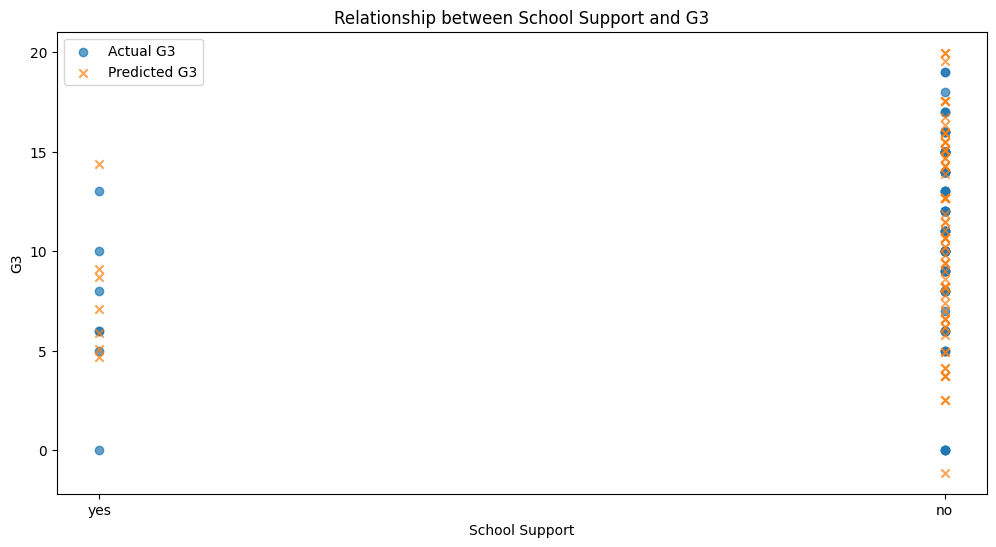

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['schoolsup', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'schoolsup'
data = pd.get_dummies(data, columns=['schoolsup'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'schoolsup_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the actual values and predicted values
print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'schoolsup' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'School Support': df.loc[X_test.index, 'schoolsup'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'schoolsup' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['School Support'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['School Support'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('School Support')
plt.ylabel('G3')
plt.title('Relationship between School Support and G3')
plt.legend()
plt.show()


Mean Squared Error: 1.9512426129959066
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.66753957 12.79567153  2.69695931  8.40125801  8.17844047 12.79567153
 19.58703787  6.40379732  4.00684449 12.79567153 15.19262436  6.00430518
 13.99414794 10.79821084 14.79313222  8.40125801  6.80328946 10.79821084
 15.99160863  5.20532091 14.39364008 15.99160863 15.59211649  4.40633663
  4.00684449 19.98653001 10.79821084  9.59973442 17.58957718 10.3987187
  7.49086497  8.00176587 15.59211649 12.79567153  6.40379732  3.89543573
 -1.0098787  15.19262436 12.79567153  6.58047192  4.98250337  9.59973442
 14.39364008  8.17844047 16.39110077  9.99922656 11.19770298 14.28223131
 11.99668725 16.79059291 13.5946558  15.19262436 10.3987187   8.40125801
  4.40633663 11

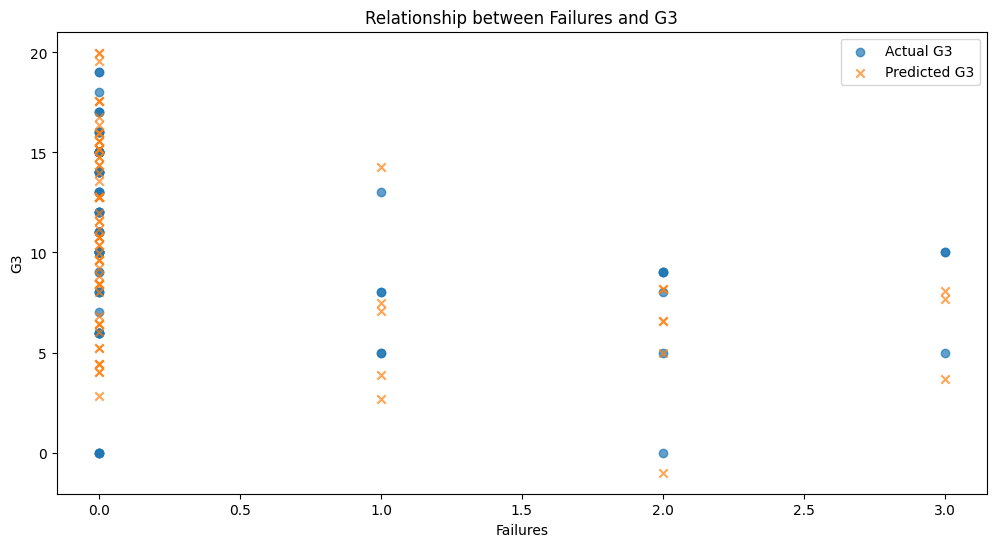

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['failures', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'failures']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the actual values and predicted values
print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'traveltime' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'Failures': df.loc[X_test.index, 'failures'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'traveltime' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Failures'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Failures'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Failures')
plt.ylabel('G3')
plt.title('Relationship between Failures and G3')
plt.legend()
plt.show()


[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.08653316 12.93606015  2.69011704  8.34789853  8.34789853 12.79329828
 19.66346153  6.32726228  3.90249879 12.79329828 15.21806178  5.78037316
 13.86291816 10.91542391 14.81393453  8.34789853  6.73138953 10.77266203
 15.8835544   4.82935679 14.55256915 16.16907815 15.62218903  4.30662604
  3.61697504 20.21035065 10.48713828  9.56028028 17.5000634  10.08301103
  7.68240591  7.80100941 15.47942715 12.79329828  6.18450041  4.04526066
 -0.80426634 15.21806178 12.93606015  6.87415141  5.11488054  9.56028028
 14.26704541  8.49066041 16.5732054   9.96440753 11.17678928 14.40980728
 11.69952003 16.97733265 13.74431465 15.21806178 10.36853478  8.34789853
  4.44938791 11.7236784  10.77266203  2.69011704 16.0

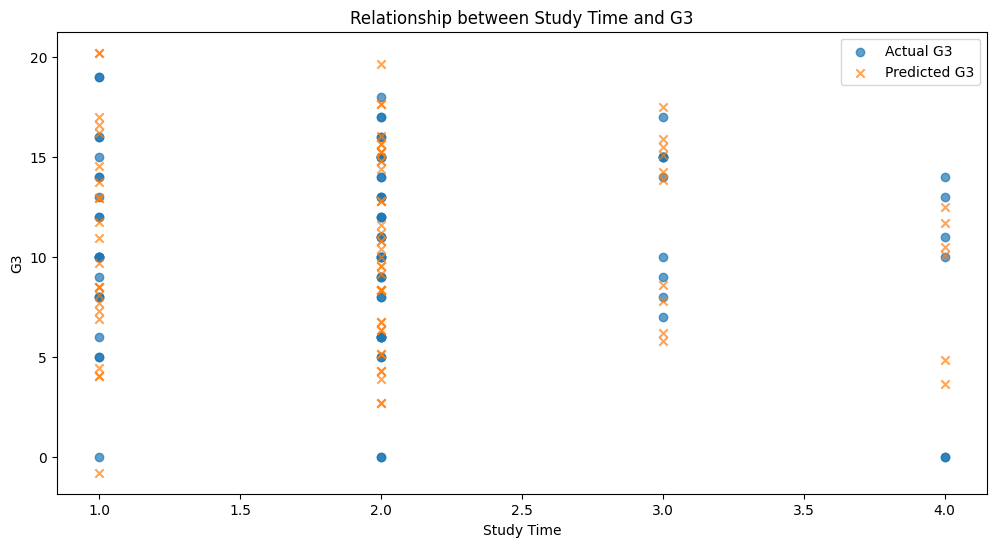

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['studytime', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'studytime']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the actual values and predicted values
print(y_test.values.tolist())
print(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Create a DataFrame with the original 'traveltime' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'Study Time': df.loc[X_test.index, 'studytime'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'traveltime' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Study Time'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Study Time'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Study Time')
plt.ylabel('G3')
plt.title('Relationship between Study Time and G3')
plt.legend()
plt.show()


[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.97751807 12.86625674  2.68607898  8.32388472  8.32388472 12.80992299
 19.59949621  6.36671642  3.95051396 12.80992299 15.1697917   5.96401601
 13.96169047 10.85275469 14.76709129  8.32388472  6.71308308 10.79642094
 16.03152627  5.15861519 14.36439088 16.03152627 15.57249211  4.35321437
  3.95051396 20.00219662 10.74008719  9.53198596 17.58599416 10.39372053
  7.57481766  8.09018557 15.57249211 12.80992299  6.31038267  3.95051396
 -0.88189096 15.1697917  12.75358924  6.71308308  5.10228144  9.53198596
 14.42072463  8.38021848 16.49056043  9.99102012 11.1427876  14.36439088
 12.11718967 16.78059334 13.55899006 15.1697917  10.33738678  8.32388472
  4.40954812 11.54548801 10.74008719  2.68607898 15.9

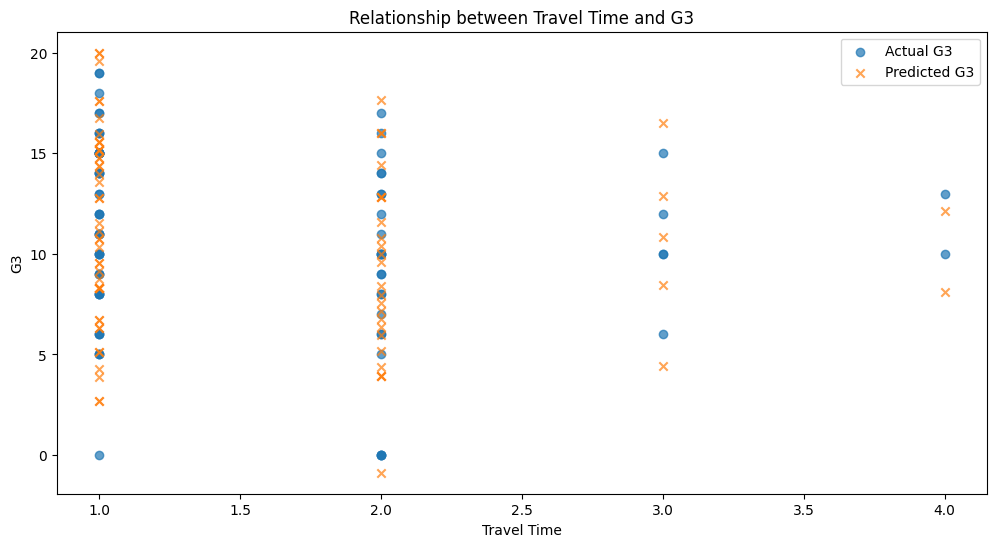

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['traveltime', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'traveltime']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the actual values and predicted values
print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'traveltime' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'Travel Time': df.loc[X_test.index, 'traveltime'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'traveltime' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Travel Time'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Travel Time'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Travel Time')
plt.ylabel('G3')
plt.title('Relationship between Travel Time and G3')
plt.legend()
plt.show()


Mean Squared Error: 1.9638465764152435
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.80452795 13.11394026  2.77366784  8.68557626  8.40976749 12.6354705
 19.68196678  6.19421377  3.98140348 12.70450756 15.05094178  5.86067227
 14.04586713 10.82523876 14.64836323  8.40976749  6.59679231 10.62257777
 15.85609887  5.18913912 14.24578469 16.05875986 15.45352032  4.38398203
  3.98140348 20.08454532 10.69161483  9.61750313 17.94488282 10.42266022
  7.47098646  7.80452795 15.52255738 13.11394026  6.19421377  3.77874249
 -0.84953907 15.11997883 12.70450756  6.59679231  5.05551518  9.61750313
 14.44844568  8.27614355 16.46133841  9.81742068 11.02515632 14.24578469
 11.83031341 16.66125596 13.50966465 15.11997883 10.21999923  8.40976749
  4.25035809 11

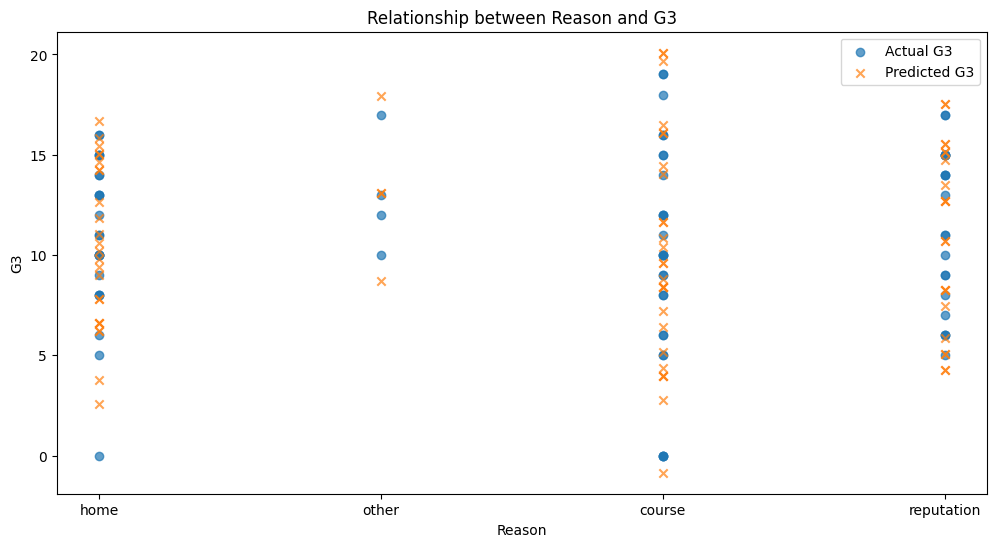

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['reason', 'G1', 'G2', 'G3']]

# One-hot encode 'reason'
data = pd.get_dummies(data, columns=['reason'], drop_first=True)

# Calculate the mean of G1, G2, and G3 for each row
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'reason_home', 'reason_reputation', 'reason_other']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the actual values and predicted values
print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'reason' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'Reason': df.loc[X_test.index, 'reason'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'reason' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Reason'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Reason'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Reason')
plt.ylabel('G3')
plt.title('Relationship between Reason and G3')
plt.legend()
plt.show()


Mean Squared Error: 1.9297397552001367
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.03629128 12.66210665  2.81193778  8.43816462  7.94183428 12.85877143
 19.49395353  6.42879789  4.01755781 12.66210665 15.27001151  6.02692455
 13.86772668 10.8494047  14.86813816  8.43816462  6.83067124 10.8494047
 15.87709342  5.22317785 14.46626482 16.0737582  15.47522007  4.41943116
  3.82089303 20.09249167 10.8494047   9.64378466 17.4845868  10.44753135
  7.13808758  8.03629128 15.67188486 12.66210665  6.42879789  3.82089303
 -1.30125269 15.27001151 12.85877143  6.83067124  5.22317785  9.44711988
 14.46626482  8.24149984 16.47563155 10.04565801 11.25127805 13.96993447
 11.85835995 16.8775049  13.66251812 15.27001151 10.44753135  8.43816462
  4.41943116 11

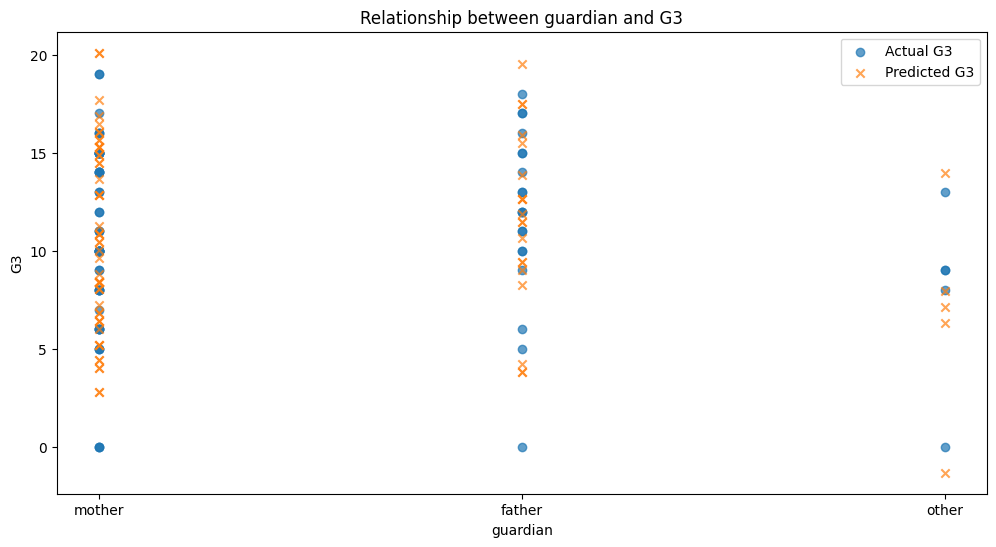

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select relevant columns for analysis
data = df[['guardian', 'G1', 'G2', 'G3']]

# One-hot encode 'guardian'
data = pd.get_dummies(data, columns=['guardian'], drop_first=True)

# Calculate the mean of G1, G2, and G3 for each row
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'guardian_mother', 'guardian_other']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the actual values and predicted values
print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'guardian' column and predicted/actual 'G3' values
plot_data = pd.DataFrame({'guardian': df.loc[X_test.index, 'guardian'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'guardian' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['guardian'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['guardian'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('guardian')
plt.ylabel('G3')
plt.title('Relationship between guardian and G3')
plt.legend()
plt.show()
